<a href="https://colab.research.google.com/github/rounak-roy-2025/Finance101/blob/rounak-roy-2025-qf/GussainTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1907110377.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="2y")  # last 2 years of data
[*********************100%***********************]  1 of 1 completed


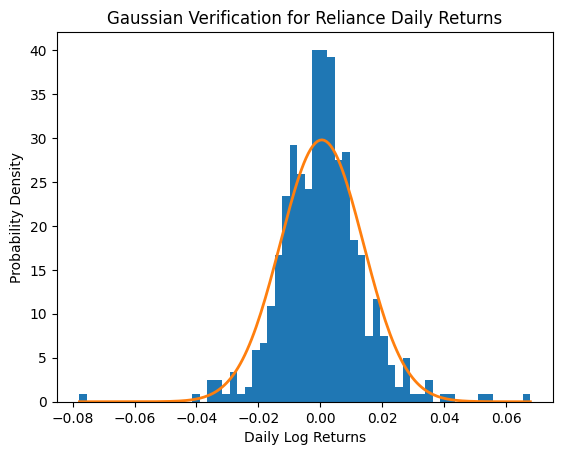

Mean (μ): 0.0004773637600344864
Standard Deviation (σ): 0.013397223566630114


In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Download historical price data for Reliance Industries
ticker = "RELIANCE.NS"
data = yf.download(ticker, period="2y")  # last 2 years of data

# Calculate daily log returns
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
returns = data['Log_Returns'].dropna()

# Fit a normal distribution to the returns
mu, sigma = norm.fit(returns)

# Plot histogram of returns
plt.hist(returns, bins=60, density=True)

# Create a range for the theoretical normal curve
xmin, xmax = returns.min(), returns.max()
x = np.linspace(xmin, xmax, 200)
p = norm.pdf(x, mu, sigma)

# Plot the Gaussian curve
plt.plot(x, p, linewidth=2)
plt.title("Gaussian Verification for Reliance Daily Returns")
plt.xlabel("Daily Log Returns")
plt.ylabel("Probability Density")
plt.show()

print("Mean (μ):", mu)
print("Standard Deviation (σ):", sigma)

In [2]:
import numpy as np
from scipy.stats import norm

# Assume returns is already calculated as daily log returns
# Example: returns = data['Log_Returns'].dropna()

# Compute mean and standard deviation of returns
mu = returns.mean()
sigma = returns.std()

# Confidence levels
confidence_95 = 0.95
confidence_99 = 0.99

# Z-scores for Gaussian distribution
z_95 = norm.ppf(1 - confidence_95)
z_99 = norm.ppf(1 - confidence_99)

# One-day Gaussian VaR
VaR_95 = -(mu + z_95 * sigma)
VaR_99 = -(mu + z_99 * sigma)

print("Gaussian VaR Results (1-Day Log Returns):")
print(f"VaR 95%: {VaR_95:.4%}")
print(f"VaR 99%: {VaR_99:.4%}")

# Example: Assume portfolio value = ₹1,00,000
portfolio_value = 100000
loss_95 = portfolio_value * VaR_95
loss_99 = portfolio_value * VaR_99

print("\nPotential loss for a ₹1,00,000 position:")
print(f"1-Day VaR 95%: ₹{loss_95:,.0f}")
print(f"1-Day VaR 99%: ₹{loss_99:,.0f}")

Gaussian VaR Results (1-Day Log Returns):
VaR 95%: 2.1581%
VaR 99%: 3.0721%

Potential loss for a ₹1,00,000 position:
1-Day VaR 95%: ₹2,158
1-Day VaR 99%: ₹3,072
